# Непараметрические криетрии

  Критерий | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
  -| -| -| -|
  **Знаков**  | $\times$ | _ | $\times$ 
  **Ранговый** | $\times$  | $\times$ | $\times$  
  **Перестановочный** | $\times$  | $\times$ | $\times$ 

## Недвижимость в Сиэттле

Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002. Изменились ли в среднем цены?

In [1]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

In [2]:
import tqdm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

In [3]:
seattle_data = pd.read_csv('seattle.txt', sep = '\t', header = 0)

In [4]:
seattle_data.shape

(100, 2)

In [5]:
seattle_data.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [6]:
price2001 = seattle_data[seattle_data['Year']  == 2001].Price
price2002 = seattle_data[seattle_data['Year']  == 2002].Price

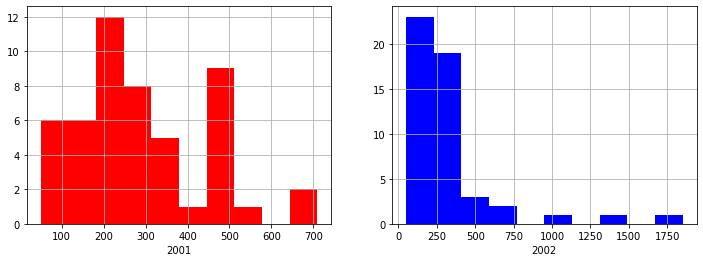

In [7]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(price2001, color = 'r')
pylab.xlabel('2001')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(price2002, color = 'b')
pylab.xlabel('2002')

pylab.show()

## Двухвыборочные критерии для независимых выборок

In [8]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(price2001))

95% confidence interval for the mean: [245.193581, 332.659499]


In [9]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(price2002))

95% confidence interval for the mean: [241.437946, 417.076334]


### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [10]:
stats.mannwhitneyu(price2001, price2002)

MannwhitneyuResult(statistic=1204.5, pvalue=0.3781936337850874)

### Перестановочный критерий

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [11]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [12]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [13]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

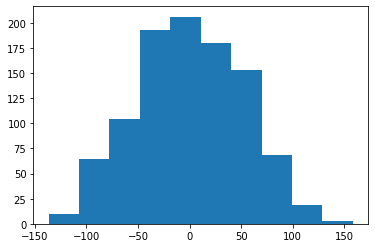

In [14]:
pylab.hist(permutation_zero_dist_ind(price2001, price2002, max_combinations = 1000))
pylab.show()

In [15]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [16]:
print("p-value: %f" % permutation_test(price2001, price2002, max_permutations = 10000))

p-value: 0.443200


In [17]:
print("p-value: %f" % permutation_test(price2001, price2002, max_permutations = 50000))

p-value: 0.444060


In [21]:
import pandas as pd
import numpy as np
from tqdm import tqdm

df = pd.DataFrame(np.random.randint(0, 100, (100000, 60)))

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
# (can use `tqdm_gui`, `tqdm_notebook`, optional kwargs, etc.)
tqdm.pandas(desc="my bar!")

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
df.progress_apply(lambda x: x**2)
# can also groupby:
df.groupby(0).progress_apply(lambda x: x**2)

my bar!: 100%|██████████| 100/100 [00:01<00:00, 66.75it/s]


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,256,289,9801,5184,3136,0,0,1089,64,25,...,529,7744,5929,9216,2500,784,8836,2809,324,2809
1,256,3025,1225,5476,1156,7056,1156,1936,9216,1521,...,4,529,1521,7744,3844,169,784,2209,1089,3481
2,7744,6400,4900,6724,6084,6084,1936,2401,2916,4624,...,0,3969,529,4489,361,1225,256,8649,4489,2809
3,9,5476,1681,64,225,625,9801,7569,1444,256,...,7569,484,3600,529,4225,441,5776,9801,289,1764
4,9025,6561,1936,16,3600,961,900,7225,3844,4761,...,5041,6561,324,784,2809,1156,1369,784,1521,441
5,2401,144,676,25,3481,4761,4356,1681,1521,49,...,7744,625,9,1225,1849,1849,4624,361,1369,1156
6,1849,3844,1156,1444,8836,289,6241,1681,225,1936,...,729,4356,441,5929,2116,0,2116,3969,7056,6400
7,1681,5329,841,4096,6400,3025,4225,784,784,841,...,361,3364,225,1600,49,400,8100,9,9801,121
8,7056,5041,6241,5625,9025,2304,7569,625,1600,400,...,361,2304,324,3481,9,49,1681,900,8649,1296
9,9801,1369,8281,3969,256,7396,8281,4225,16,1225,...,400,676,3969,2304,1296,1,16,3025,1600,1444
